In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
data = pd.read_csv('sum_data.csv')
data.head()

,index,reviewerID,productID,reviewText,rating,helpful,time,helped,unhelped,sum_helped
0,0,67737,0528881469,We got this GPS for my husband who is an (OTR)...,5.0,"[0, 0]","06 2, 2013",0,0,0
1,1,176236,0594451647,The cable is very wobbly and sometimes disconn...,2.0,"[0, 0]","04 27, 2014",0,0,0
2,2,94526,0594481813,It does 2A and charges a DEAD Nook in a few ho...,3.0,"[0, 0]","08 31, 2013",0,0,0
3,3,71584,0594451647,This adaptor is real easy to setup and use rig...,5.0,"[0, 0]","05 4, 2014",0,0,0
4,4,105796,0594451647,This adapter easily connects my Nook HD 7&#34;...,4.0,"[0, 0]","07 11, 2014",0,0,0


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689188 entries, 0 to 1689187
Data columns (total 10 columns):
index         1689188 non-null int64
reviewerID    1689188 non-null int64
productID     1689188 non-null object
reviewText    1688117 non-null object
rating        1689188 non-null float64
helpful       1689188 non-null object
time          1689188 non-null object
helped        1689188 non-null int64
unhelped      1689188 non-null int64
sum_helped    1689188 non-null int64
dtypes: float64(1), int64(5), object(4)
memory usage: 128.9+ MB


In [69]:
data.reviewTime = pd.to_datetime(data.time)

C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [6]:
df = pd.DataFrame(data = {'year': np.arange(1999,2014),
                              'countReview': 0})
df

,year,countReview
0,1999,0
1,2000,0
2,2001,0
3,2002,0
4,2003,0
5,2004,0
6,2005,0
7,2006,0
8,2007,0
9,2008,0


In [7]:
for i in range (1999,2014):
    start = str(i) + '-01-01'
    end = str(i) + '-12-31'
    df['countReview'][i-1999] = data[(data.reviewTime >= start) & (data.reviewTime <= end)].shape[0]
    print(data[(data.reviewTime >= start) & (data.reviewTime <= end)].shape[0])


C:\Users\Asus\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


72
817
1609
2315
3547
5159
9638
15447
35976
49872
70666
103797
173395
282942
592748


In [8]:
df.set_index('year', inplace=True)
df = df.reset_index()

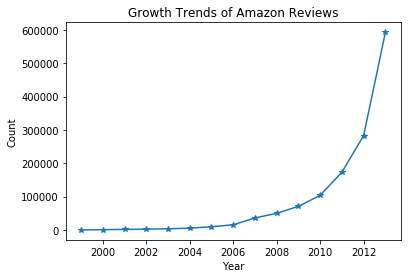

In [9]:
x = df.year
y = df.countReview
plt.plot(x, y, '*-')
plt.title('Growth Trends of Amazon Reviews')
plt.xlabel('Year')
plt.ylabel('Count')

plt.show()

In [52]:
count = data.groupby(['reviwerID']).size().to_frame('count').reset_index()
count['count'].describe()

count    192403.000000
mean          8.779427
std           8.263942
min           5.000000
25%           5.000000
50%           7.000000
75%           9.000000
max         431.000000
Name: count, dtype: float64

Text(0,0.5,'Frequrncy')

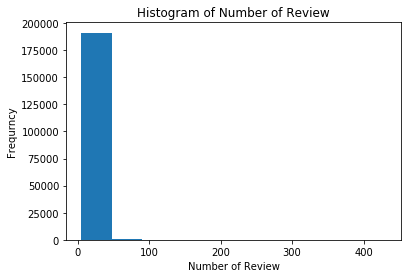

In [40]:
# fig, axes = plt.subplots()
# ax0, ax1, ax2 = axes.flatten()
x = count['count']
plt.hist(x)
plt.title('Histogram of Number of Review')
plt.xlabel('Number of Review')
plt.ylabel('Frequrncy')

Text(0,0.5,'Frequrncy')

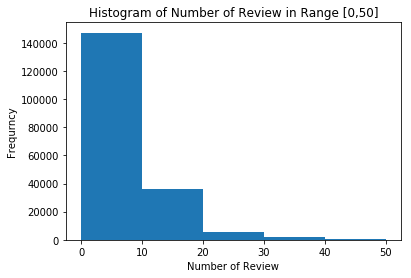

In [41]:
plt.hist(x, bins=[0,10,20,30,40,50])
plt.title('Histogram of Number of Review in Range [0,50]')
plt.xlabel('Number of Review')
plt.ylabel('Frequrncy')

Text(0,0.5,'Frequrncy')

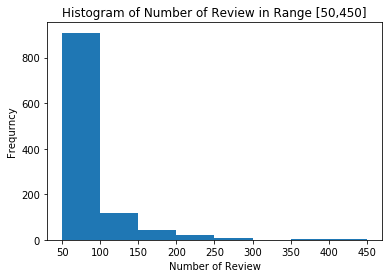

In [48]:
plt.hist(x, bins=[50,100,150,200,250,300,350,400,450])
plt.title('Histogram of Number of Review in Range [50,450]')
plt.xlabel('Number of Review')
plt.ylabel('Frequrncy')

In [54]:
amz = pd.read_csv('sum_data.csv')

In [55]:
amz.head()

,index,reviewerID,productID,reviewText,rating,helpful,time,helped,unhelped,sum_helped
0,0,67737,0528881469,We got this GPS for my husband who is an (OTR)...,5.0,"[0, 0]","06 2, 2013",0,0,0
1,1,176236,0594451647,The cable is very wobbly and sometimes disconn...,2.0,"[0, 0]","04 27, 2014",0,0,0
2,2,94526,0594481813,It does 2A and charges a DEAD Nook in a few ho...,3.0,"[0, 0]","08 31, 2013",0,0,0
3,3,71584,0594451647,This adaptor is real easy to setup and use rig...,5.0,"[0, 0]","05 4, 2014",0,0,0
4,4,105796,0594451647,This adapter easily connects my Nook HD 7&#34;...,4.0,"[0, 0]","07 11, 2014",0,0,0


In [57]:
df2 = amz.groupby(['reviewerID']).agg({'sum_helped': 'mean'})
count = amz.groupby(['reviewerID']).size().to_frame('count')
df2 = pd.merge(df2, count, on='reviewerID').reset_index()
df2.sort_values('count', ascending=False)

,reviewerID,sum_helped,count
106721,106722,43.703016,431
136669,136670,4.594595,407
100073,100074,18.125341,367
90460,90461,17.488636,352
42479,42480,23.629630,351
99286,99287,3.078078,333
102647,102648,9.224199,281
124821,124822,5.554307,267
122139,122140,5.977011,261
89289,89290,7.380769,260


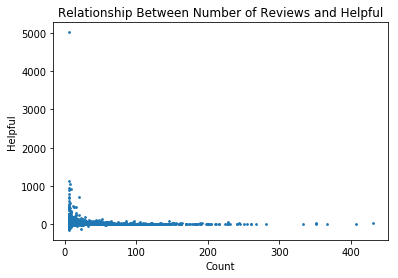

In [65]:
y = df2['sum_helped']
x = df2['count']
fig,ax = plt.subplots()
plt.title('Relationship Between Number of Reviews and Helpful')
plt.xlabel('Count')
plt.ylabel('Helpful')
ax.scatter(x, y, s=3)  